In [14]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [15]:
%reload_ext autoreload

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
from src.utils import *
from src.cleaning import *

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

### IMPORT DATA

In [19]:
df_riders = pd.read_csv("data/Riders.csv")
df_sample_submission = pd.read_csv("data/SampleSubmission.csv")
df_test = pd.read_csv("data/Test.csv")
df_train = pd.read_csv("data/Train.csv")
df_variable_definitions = pd.read_csv("data/VariableDefinitions.csv")

In [144]:
df_test['orders'] = df_test['Order No'].str.split('_').str[-1].astype(int)

In [145]:
df_test

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,orders
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,19248
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,12736
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,768
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,15332
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,21373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49 AM,7,1,...,10:48:18 AM,5,24.8,NaN,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362,3612
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,2:59:42 PM,10,3,...,3:21:44 PM,22,30.7,NaN,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669,7657
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,...,3:07:52 PM,10,25.1,NaN,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379,1969
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,...,3:46:35 PM,18,23.6,NaN,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474,10591


In [146]:
df_test.sort_values(by=['orders'])

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,orders
786,Order_No_0,User_Id_1085,Bike,3,Business,26,2,1:47:47 PM,26,2,...,2:20:40 PM,8,31.0,NaN,-1.301908,36.759282,-1.316539,36.706856,Rider_Id_678,0
2570,Order_No_5,User_Id_1710,Bike,3,Personal,19,6,10:30:13 AM,19,6,...,10:47:38 AM,4,25.3,NaN,-1.296310,36.768822,-1.294436,36.798342,Rider_Id_45,5
6883,Order_No_11,User_Id_3400,Bike,1,Personal,20,5,11:38:21 AM,20,5,...,12:07:55 PM,6,18.5,NaN,-1.289192,36.825189,-1.308378,36.859008,Rider_Id_546,11
6200,Order_No_13,User_Id_2733,Bike,3,Business,11,4,5:14:02 PM,11,4,...,5:20:50 PM,1,26.6,NaN,-1.295571,36.782114,-1.296310,36.768822,Rider_Id_348,13
3458,Order_No_14,User_Id_2575,Bike,2,Personal,26,6,11:16:30 AM,26,6,...,11:37:02 AM,18,22.5,NaN,-1.286990,36.829735,-1.185866,36.928871,Rider_Id_100,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Order_No_28256,User_Id_1246,Bike,3,Business,14,1,2:37:31 PM,14,1,...,3:05:01 PM,9,26.0,NaN,-1.257147,36.795063,-1.310878,36.839273,Rider_Id_26,28256
4122,Order_No_28257,User_Id_1825,Bike,1,Personal,16,3,2:18:00 PM,16,3,...,2:40:07 PM,8,25.5,NaN,-1.301628,36.805522,-1.260972,36.848081,Rider_Id_101,28257
5575,Order_No_28258,User_Id_510,Bike,3,Business,22,5,1:43:52 PM,22,5,...,2:13:27 PM,12,27.1,NaN,-1.286018,36.897534,-1.323921,36.870766,Rider_Id_856,28258
3895,Order_No_28260,User_Id_391,Bike,3,Business,25,1,12:50:38 PM,25,1,...,1:21:44 PM,5,27.2,NaN,-1.300921,36.828195,-1.278406,36.822293,Rider_Id_448,28260


In [147]:
df_test['orders'] = df_test['Order No'].str.split('_').str[-1].astype(int)
df_train['orders'] = df_train['Order No'].str.split('_').str[-1].astype(int)

In [148]:
display_all(df_train.sort_values(by=['orders']).head(20))

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,orders
6831,Order_No_1,User_Id_556,Bike,1,Personal,9,2,12:10:50 PM,9,2,12:12:24 PM,9,2,12:15:06 PM,9,2,12:20:43 PM,9,2,12:32:52 PM,4,21.8,NaN,-1.274173,36.796911,-1.265971,36.766806,Rider_Id_848,729,1
720,Order_No_2,User_Id_3517,Bike,3,Business,18,4,10:09:10 AM,18,4,10:09:50 AM,18,4,10:12:28 AM,18,4,10:51:52 AM,18,4,11:23:55 AM,16,NaN,NaN,-1.300921,36.828195,-1.388201,36.769945,Rider_Id_148,1923,2
18360,Order_No_3,User_Id_635,Bike,3,Business,29,3,3:00:12 PM,29,3,3:16:26 PM,29,3,3:51:52 PM,29,3,3:53:37 PM,29,3,4:30:03 PM,4,20.9,NaN,-1.260234,36.799055,-1.283333,36.826008,Rider_Id_393,2186,3
694,Order_No_4,User_Id_2377,Bike,3,Personal,12,2,2:58:52 PM,12,2,2:59:22 PM,12,2,3:18:55 PM,12,2,3:52:51 PM,12,2,4:20:59 PM,5,NaN,NaN,-1.301607,36.840449,-1.285565,36.824483,Rider_Id_181,1688,4
20620,Order_No_6,User_Id_3550,Bike,1,Personal,3,5,2:37:48 PM,3,5,3:29:21 PM,3,5,3:43:04 PM,3,5,4:03:58 PM,3,5,4:12:25 PM,4,25.0,NaN,-1.300391,36.734016,-1.299820,36.764400,Rider_Id_636,507,6
11872,Order_No_7,User_Id_60,Bike,3,Business,27,4,9:35:31 AM,27,4,9:36:02 AM,27,4,9:47:43 AM,27,4,9:53:17 AM,27,4,10:06:08 AM,8,18.6,3.0,-1.272828,36.816608,-1.229662,36.843827,Rider_Id_882,771,7
2745,Order_No_8,User_Id_3661,Bike,3,Business,15,1,1:11:46 PM,15,1,1:15:42 PM,15,1,1:30:22 PM,15,1,1:39:06 PM,15,1,2:11:45 PM,17,NaN,NaN,-1.213287,36.867827,-1.298733,36.846335,Rider_Id_8,1959,8
5234,Order_No_9,User_Id_868,Bike,3,Business,17,1,1:12:36 PM,17,1,1:13:00 PM,17,1,1:13:26 PM,17,1,1:58:13 PM,17,1,2:11:13 PM,10,24.8,NaN,-1.228911,36.881876,-1.265715,36.823815,Rider_Id_260,780,9
11976,Order_No_10,User_Id_491,Bike,1,Personal,24,5,11:39:26 AM,24,5,11:40:55 AM,24,5,11:48:22 AM,24,5,11:57:03 AM,24,5,12:09:56 PM,4,20.8,NaN,-1.293870,36.790781,-1.280848,36.800369,Rider_Id_865,773,10
14795,Order_No_12,User_Id_1934,Bike,2,Personal,16,3,10:57:05 AM,16,3,11:27:53 AM,16,3,11:42:45 AM,16,3,11:49:23 AM,16,3,12:18:01 PM,6,24.0,NaN,-1.287501,36.817179,-1.250292,36.788757,Rider_Id_949,1718,12


In [149]:
display_all(df_riders)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156
5,Rider_Id_720,2608,1798,13.2,504
6,Rider_Id_95,3464,1304,13.4,950
7,Rider_Id_122,4831,2124,14.1,1469
8,Rider_Id_900,1936,1436,14.2,610
9,Rider_Id_196,550,2379,13.4,224


In [21]:
disjoint_cols = [
    "Arrival at Destination - Time",
    "Arrival at Destination - Weekday (Mo = 1)",
    "Arrival at Destination - Day of Month",
    "User Id",
    "Vehicle Type",
]
def combine_train_test(train, test, rider, disjoint_cols):
    train["col_type"] = "train"
    test["col_type"] = "test"
    df_train_test = pd.concat(
        [train.drop(disjoint_cols, axis=1), test], ignore_index=True, sort=True
    )
    df_merged = df_train_test.merge(rider, how="left", on="Rider Id")
    #df = df_merged.drop("Rider Id", axis=1)
    return df_merged


In [22]:
df = combine_train_test(df_train, df_test, df_riders, disjoint_cols)

#### Placement time

In [153]:
df['Placement - Time'] = pd.to_datetime(df['Placement - Time'])

In [154]:
df['Placement - Time'] = pd.to_datetime(df['Placement - Time'])
df['placement_hour'] = df['Placement - Time'].apply(lambda x: x.hour)

In [156]:
df.placement_hour.value_counts()

14    3652
12    3651
11    3591
10    3544
15    3377
13    3067
9     2872
16    1852
8     1257
17     720
18     271
7      216
19     125
20      41
21      16
6       13
22       3
0        1
Name: placement_hour, dtype: int64

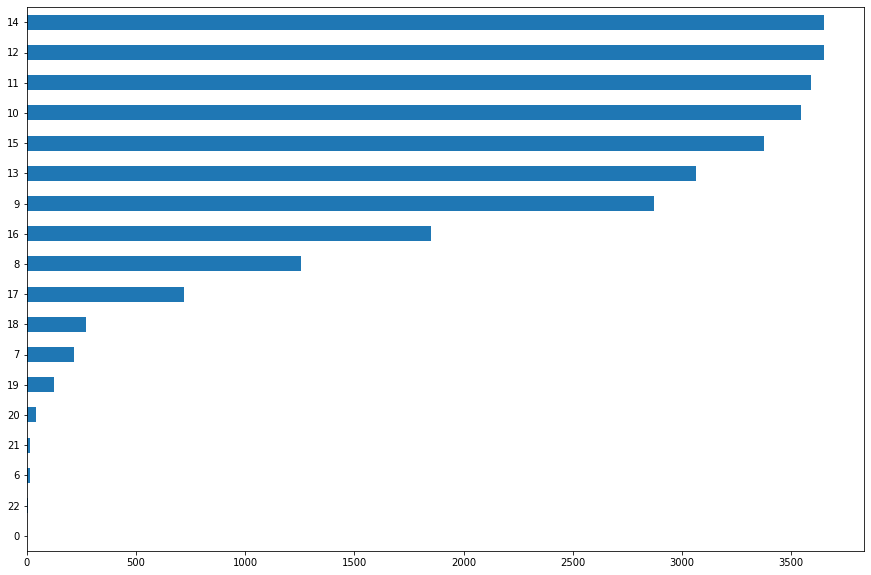

In [166]:
df.placement_hour.value_counts().sort_values().plot(kind = 'barh')

#### Confirmation - Time

In [168]:
df['Confirmation - Time'] = pd.to_datetime( df['Confirmation - Time'])

In [169]:
df['conf_hour'] = df['Confirmation - Time'].apply(lambda x: x.hour)

In [ ]:
df['Placement - Time'] = pd.to_datetime(df['Placement - Time'])
df['placement_hour'] = df['Placement - Time'].apply(lambda x: x.hour)
df['Confirmation - Time'] = pd.to_datetime( df['Confirmation - Time'])
df['conf_hour'] = df['Confirmation - Time'].apply(lambda x: x.hour)

/Users/socrates/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


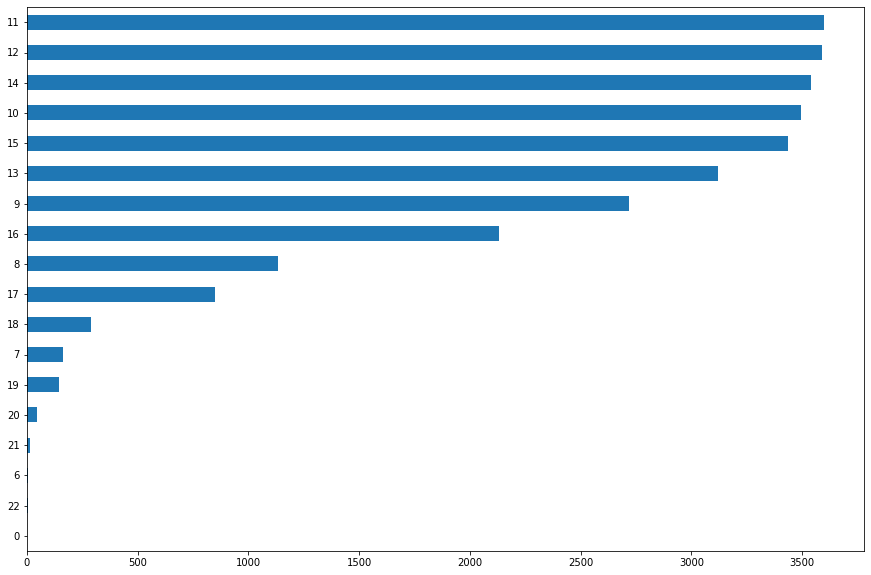

In [170]:
df['conf_hour'].value_counts().sort_values().plot('barh')

#### Pickup time

In [162]:
df['Pickup - Time'] = pd.to_datetime(df['Pickup - Time'])

In [163]:
df['pick_up_time'] = df['Pickup - Time'].apply(lambda x: x.hour)

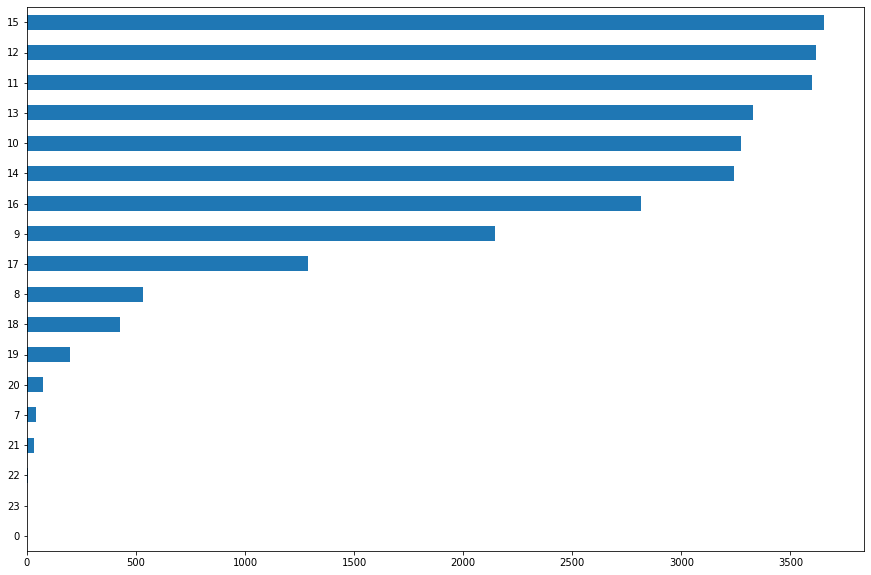

In [165]:
df.pick_up_time.value_counts().sort_values().plot(kind='barh')

In [191]:
df.head()

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Destination Lat,Destination Long,Distance (KM),Order No,...,Vehicle Type,col_type,orders,No_Of_Orders,Age,Average_Rating,No_of_Ratings,placement_hour,pick_up_time,conf_hour
0,9,10:04:47 AM,5,9,2019-11-06 09:40:10,5,-1.300406,36.829741,4,Order_No_4211,...,NaN,train,4211,1637,1309,13.8,549,9,10,9
1,12,11:40:22 AM,5,12,2019-11-06 11:23:21,5,-1.295004,36.814358,16,Order_No_25375,...,NaN,train,25375,396,339,13.6,69,11,11,11
2,30,12:49:34 PM,2,30,2019-11-06 12:42:44,2,-1.300921,36.828195,3,Order_No_1899,...,NaN,train,1899,1023,242,12.5,114,12,12,12
3,15,9:37:56 AM,5,15,2019-11-06 09:26:05,5,-1.257147,36.795063,9,Order_No_9336,...,NaN,train,9336,886,283,14.5,113,9,9,9
4,13,10:03:53 AM,1,13,2019-11-06 09:56:18,1,-1.295041,36.809817,9,Order_No_27883,...,NaN,train,27883,2311,872,14.1,533,9,10,9


In [192]:
df['Pickup Lat'].nunique(),df['Pickup Long'].nunique()

(4393, 4377)

In [193]:
df['Destination Lat'].nunique(),df['Destination Long'].nunique()

(6246, 6203)

In [ ]:
import openrouteservice

from openrouteservice.directions import directions

client = openrouteservice.Client(key='xxxxxxxx') # Specify your personal API key

rootTrain=[]

rootTest=[]

train=train[['Order No', 'Pickup Long','Pickup Lat','Destination Long','Destination Lat']]

test=test[['Order No', 'Pickup Long','Pickup Lat','Destination Long','Destination Lat']]

for i in train.index:

    coords=((train.at[i,'Pickup Long'],train.at[i,'Pickup Lat']),(train.at[i,'Destination Long'],train.at[i,'Destination Lat']))

    rootTrain.append(directions(client, coords))

    train['root']=rootTrain



In [23]:
al = []

for i in df.index:
    coords=(df.at[i,'Pickup Long'],df.at[i,'Pickup Lat']),(df.at[i,'Destination Long'],df.at[i,'Destination Lat'])
    al.append(coords)
len(al)

28269

In [24]:
df.shape

(28269, 31)

In [25]:
al_unique = tuple(set(al))

In [26]:
len(al_unique)

16465

In [206]:
al_unique

(((36.8122348, -1.2143841999999998), (36.7000029, -1.3169591)),
 ((36.8640088, -1.2696795), (36.828195, -1.300921)),
 ((36.8684596, -1.3038645), (36.814358299999995, -1.2950041)),
 ((36.825364, -1.279395), (36.789537599999996, -1.2553615)),
 ((36.8264616, -1.2862659), (36.7688221, -1.2963097)),
 ((36.8247135, -1.2810888999999999), (36.838581700000006, -1.3077517)),
 ((36.792225099999996, -1.2772632), (36.811186299999996, -1.2962731)),
 ((36.8235208, -1.2701385), (36.6917289, -1.2565206)),
 ((36.7886014, -1.2836583000000001), (36.7540383, -1.3050802)),
 ((36.786086299999994, -1.3124203), (36.802279299999995, -1.270186)),
 ((36.79905479999999, -1.2602337), (36.8374042, -1.2922966)),
 ((36.774089000000004, -1.2932803), (36.8304605, -1.2853860000000001)),
 ((36.808679600000005, -1.2546732), (36.803925, -1.27778)),
 ((36.7895263, -1.2508229), (36.831197700000004, -1.2608591999999998)),
 ((36.795063299999995, -1.2571472), (36.764855, -1.292188)),
 ((36.764620799999996, -1.2874711), (36.78132

In [27]:
import openrouteservice

from openrouteservice.directions import directions

client = openrouteservice.Client(key='5b3ce3597851110001cf6248979e7a5eaa8544658161ad626e422d36') # Specify your personal API key

In [31]:
16465/4000


4.11625

In [33]:
for cord in al_unique:
    print(cord)

((36.8122348, -1.2143841999999998), (36.7000029, -1.3169591))
((36.8640088, -1.2696795), (36.828195, -1.300921))
((36.8684596, -1.3038645), (36.814358299999995, -1.2950041))
((36.825364, -1.279395), (36.789537599999996, -1.2553615))
((36.8264616, -1.2862659), (36.7688221, -1.2963097))
((36.8247135, -1.2810888999999999), (36.838581700000006, -1.3077517))
((36.792225099999996, -1.2772632), (36.811186299999996, -1.2962731))
((36.8235208, -1.2701385), (36.6917289, -1.2565206))
((36.7886014, -1.2836583000000001), (36.7540383, -1.3050802))
((36.786086299999994, -1.3124203), (36.802279299999995, -1.270186))
((36.79905479999999, -1.2602337), (36.8374042, -1.2922966))
((36.774089000000004, -1.2932803), (36.8304605, -1.2853860000000001))
((36.808679600000005, -1.2546732), (36.803925, -1.27778))
((36.7895263, -1.2508229), (36.831197700000004, -1.2608591999999998))
((36.795063299999995, -1.2571472), (36.764855, -1.292188))
((36.764620799999996, -1.2874711), (36.781327399999995, -1.2922857))
((36.8

((36.8180835, -1.2929499), (36.795063299999995, -1.2571472))
((36.71462329999999, -1.3326173000000001), (36.764129, -1.2892762))
((36.7822034, -1.2551895), (36.7781201, -1.3014732))
((36.8218042, -1.2824911), (36.7856612, -1.2969741000000001))
((36.7822034, -1.2551895), (36.807181, -1.2584505))
((36.8754415, -1.3246455), (36.93644929999999, -1.3802928))
((36.787082700000006, -1.2674273999999999), (36.8358841, -1.2653185))
((36.7822034, -1.2551895), (36.822194, -1.2817196000000002))
((36.7895263, -1.2508229), (36.74222520000001, -1.2884996000000002))
((36.8251128, -1.2782498), (36.8012024, -1.301796))
((36.895160499999996, -1.3271247), (36.7963716, -1.2918309))
((36.794723, -1.2726389999999999), (36.7704915, -1.3004844))
((36.7822034, -1.2551895), (36.8239003, -1.3015661))
((36.881950700000004, -1.2297202), (36.7000029, -1.3169591))
((36.815551, -1.2899256000000001), (36.825364, -1.279395))
((36.826633799999996, -1.2733186), (36.8226308, -1.3108368000000001))
((36.80161, -1.261692), (36

((36.8421201, -1.308819), (36.7822034, -1.2551895))
((36.82294, -1.2843061000000002), (36.7828041, -1.2953162))
((36.79691079999999, -1.2741728), (36.808753499999995, -1.2933788999999998))
((36.761081, -1.301735), (36.79524620000001, -1.2684239))
((36.828195, -1.300921), (36.710118, -1.2239243))
((36.828195, -1.300921), (36.8055169, -1.2692689))
((36.8122848, -1.2892766000000002), (36.7967953, -1.2824577))
((36.828195, -1.300921), (36.802019, -1.3210621999999999))
((36.7929516, -1.2709086), (36.8294932, -1.1992502))
((36.7965104, -1.2768829), (36.837965999999994, -1.3223922))
((36.7933541, -1.2535486), (36.8000283, -1.2290218000000002))
((36.770468, -1.30217), (36.82376729999999, -1.2882073))
((36.6973045, -1.3117864), (36.7947375, -1.2941585))
((36.851364600000004, -1.2765736), (36.8230419, -1.2885315))
((36.825293, -1.280027), (36.7688221, -1.2963097))
((36.8281144, -1.2842021000000001), (36.7848695, -1.304033))
((36.889232899999996, -1.3321944), (36.907821999999996, -1.325517))
((36

((36.8112044, -1.3173868999999998), (36.777206899999996, -1.2993093999999998))
((36.8009029, -1.2326041), (36.792122799999994, -1.2980345))
((36.830024, -1.2555969999999999), (36.78865, -1.2980228999999999))
((36.8719901, -1.3226301999999999), (36.8112138, -1.2564799))
((36.7993448, -1.2612974), (36.833113399999995, -1.311943))
((36.81338529999999, -1.2852951000000001), (36.7888767, -1.2594002))
((36.831327200000004, -1.3091799), (36.8863135, -1.3396256000000002))
((36.9190174, -1.3700383), (36.789133500000005, -1.2591485))
((36.7742999, -1.294597), (36.80021370000001, -1.2642903))
((36.71462329999999, -1.3326173000000001), (36.806489500000005, -1.2536041999999998))
((36.8306719, -1.2836832), (36.71859179999999, -1.3094179))
((36.78955379999999, -1.2922364), (36.74222520000001, -1.2884996000000002))
((36.7968296, -1.2857117), (36.8261656, -1.3012237))
((36.8228765, -1.2651218000000002), (36.74107720000001, -1.2577288999999998))
((36.769815200000004, -1.2879236), (36.7822034, -1.2551895

((36.8153854, -1.2421591), (36.828148, -1.2655306))
((36.7822034, -1.2551895), (36.831683500000004, -1.3239488000000001))
((36.71462329999999, -1.3326173000000001), (36.7661381, -1.3014461000000002))
((36.8168312, -1.28878), (36.826163, -1.2848173999999999))
((36.828195, -1.300921), (36.801959499999995, -1.283016))
((36.8861711, -1.2237773), (36.789867, -1.2559559999999999))
((36.7822034, -1.2551895), (36.7880497, -1.2972916))
((36.844901799999995, -1.258348), (36.8161046, -1.3066143))
((36.82182, -1.311452), (36.811298, -1.273056))
((36.7822034, -1.2551895), (36.808562200000004, -1.2684816))
((36.8343657, -1.2850643999999998), (36.8411437, -1.314945))
((36.794658, -1.3122610000000001), (36.8273738, -1.2626954))
((36.794723, -1.2726389999999999), (36.8026947, -1.2886303))
((36.786537200000005, -1.3037478999999998), (36.783024100000006, -1.2827576))
((36.8048002, -1.2584143), (36.8900627, -1.3146822))
((36.7822034, -1.2551895), (36.824019899999996, -1.2711982))
((36.897607, -1.293515), 

((36.7822034, -1.2551895), (36.797388399999996, -1.2864746999999999))
((36.9053492, -1.2927792), (36.870814700000004, -1.3332749))
((36.8412311, -1.2270789), (36.78088270000001, -1.3209614))
((36.7657388, -1.2745187), (36.8198572, -1.2988168))
((36.9138018, -1.3433181), (36.9550037, -1.287957))
((36.8043641, -1.2852583999999998), (36.7928847, -1.2945362))
((36.8018598, -1.2658373), (36.808679600000005, -1.2546732))
((36.825364, -1.279395), (36.8168312, -1.28878))
((36.8077307, -1.2261753), (36.8863135, -1.3396256000000002))
((36.8109744, -1.2733047), (36.8130185, -1.2753108999999998))
((36.794723, -1.2726389999999999), (36.842164000000004, -1.2575690000000002))
((36.7747575, -1.2607568999999998), (36.8132178, -1.2744463))
((36.8756811, -1.2859912), (36.7690312, -1.3467388999999999))
((36.8151527, -1.2945041000000002), (36.817823700000005, -1.2987440000000001))
((36.802784, -1.292008), (36.7774108, -1.2907853999999999))
((36.831860999999996, -1.2543163999999998), (36.7952365, -1.2458628

((36.7674818, -1.2986213), (36.790587, -1.2844001))
((36.822184899999996, -1.305399), (36.768164, -1.3463041999999998))
((36.9190174, -1.3700383), (36.830352600000005, -1.2768753000000002))
((36.82592329999999, -1.2793686000000002), (36.904295399999995, -1.3562374))
((36.886055999999996, -1.215909), (36.8048002, -1.2584143))
((36.790586499999996, -1.2915306999999998), (36.743672, -1.3011736999999999))
((36.793734, -1.2729802), (36.7901963, -1.3025299))
((36.7822034, -1.2551895), (36.786679799999995, -1.2650523))
((36.882646799999996, -1.2285834999999998), (36.926895200000004, -1.1971022))
((36.811721999999996, -1.3147073999999999), (36.7822034, -1.2551895))
((36.8236622, -1.2857763999999998), (36.7753792, -1.2456848999999999))
((36.864345, -1.326825), (36.7822034, -1.2551895))
((36.7661381, -1.3014461000000002), (36.7822034, -1.2551895))
((36.8707935, -1.3302996), (36.8373109, -1.3184778999999998))
((36.836278, -1.2662973999999998), (36.8003368, -1.273854))
((36.8152651, -1.312942), (3

((36.8068369, -1.2629666000000002), (36.862965700000004, -1.313616))
((36.8241519, -1.2886923000000001), (36.8048002, -1.2584143))
((36.795063299999995, -1.2571472), (36.7661381, -1.3014461000000002))
((36.678007, -1.329648), (36.8057971, -1.266294))
((36.828195, -1.300921), (36.823310600000006, -1.2839568000000001))
((36.7952081, -1.2681003999999998), (36.930829700000004, -1.335477))
((36.795063299999995, -1.2571472), (36.864345, -1.326825))
((36.9078924, -1.3533402), (36.795063299999995, -1.2571472))
((36.791039000000005, -1.2728424999999999), (36.8223726, -1.2797536))
((36.8084901, -1.3193222), (36.806273, -1.2594753))
((36.8108257, -1.3117438999999997), (36.828195, -1.300921))
((36.7913036, -1.2965045), (36.812940999999995, -1.290641))
((36.8358841, -1.2653185), (36.787082700000006, -1.2674273999999999))
((36.7822034, -1.2551895), (36.820668299999994, -1.2788182))
((36.832396200000005, -1.2813012), (36.798177700000004, -1.2695287))
((36.8925275, -1.3331402), (36.931042100000006, -1

((36.82176, -1.2850851), (36.783826700000006, -1.3039695))
((36.798177700000004, -1.2649605), (36.859699, -1.3024388))
((36.8621006, -1.3357318999999999), (36.780086700000005, -1.2560455))
((36.710894200000006, -1.3340618), (36.82365120000001, -1.283527))
((36.828148, -1.2655306), (36.7911903, -1.214328))
((36.7669809, -1.2765492), (36.7569331, -1.2959724))
((36.8205148, -1.2719423), (36.8149619, -1.265007))
((36.9053492, -1.2927792), (36.8756811, -1.2859912))
((36.789537599999996, -1.2553615), (36.71116729999999, -1.3491868))
((36.7688221, -1.2963097), (36.795287, -1.285355))
((36.794723, -1.2726389999999999), (36.86049860000001, -1.3065271999999999))
((36.783263299999994, -1.322999), (36.7866984, -1.2884066))
((36.8916865, -1.2156006000000001), (36.845465999999995, -1.3008656))
((36.819573, -1.27871), (36.9190174, -1.3700383))
((36.7928732, -1.2615888000000002), (36.9114173, -1.3103985))
((36.7603541, -1.2918688), (36.7964048, -1.2762513))
((36.8374277, -1.227132), (36.7703475, -1.29

In [39]:
import csv
toCSV = [{'name':'bob','age':25,'weight':200},
         {'name':'jim','age':31,'weight':180}]
keys = toCSV[0].keys()
with open('people.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(toCSV)

In [50]:
rt[20:30]

[(((36.8299116, -1.2807298), (36.8371762, -1.3211950000000001)),
  {'bbox': [36.820566, -1.321952, 36.842207, -1.280061],
   'routes': [{'summary': {'distance': 7270.8, 'duration': 653.6},
     'segments': [{'distance': 7270.8,
       'duration': 653.6,
       'steps': [{'distance': 214.4,
         'duration': 51.4,
         'type': 11,
         'instruction': 'Head northwest',
         'name': '-',
         'way_points': [0, 4]},
        {'distance': 90.9,
         'duration': 21.8,
         'type': 0,
         'instruction': 'Turn left onto Voi Road',
         'name': 'Voi Road',
         'way_points': [4, 9]},
        {'distance': 473.5,
         'duration': 59.1,
         'type': 4,
         'instruction': 'Turn slight left onto Voi Road',
         'name': 'Voi Road',
         'way_points': [9, 29]},
        {'distance': 220.1,
         'duration': 17.6,
         'type': 0,
         'instruction': 'Turn left onto Tom Mboya Street',
         'name': 'Tom Mboya Street',
         'way

In [48]:
len(rt)

62

In [52]:
rt[26]

(((36.7692638, -1.3472066), (36.832396200000005, -1.2813012)),
 {'bbox': [36.76819, -1.353761, 36.833296, -1.281191],
  'routes': [{'summary': {'distance': 22305.6, 'duration': 2595.2},
    'segments': [{'distance': 22305.6,
      'duration': 2595.2,
      'steps': [{'distance': 269.4,
        'duration': 64.7,
        'type': 11,
        'instruction': 'Head east',
        'name': '-',
        'way_points': [0, 5]},
       {'distance': 4372.2,
        'duration': 1049.3,
        'type': 1,
        'instruction': 'Turn right',
        'name': '-',
        'way_points': [5, 92]},
       {'distance': 332.9,
        'duration': 79.9,
        'type': 0,
        'instruction': 'Turn left',
        'name': '-',
        'way_points': [92, 94]},
       {'distance': 3014.1,
        'duration': 361.7,
        'type': 0,
        'instruction': 'Turn left',
        'name': '-',
        'way_points': [94, 143]},
       {'distance': 1222.3,
        'duration': 146.7,
        'type': 12,
        'ins

In [28]:
rt=[]


for cord in al_unique:
    rt.append((cord, directions(client, cord)))
 

/Users/socrates/anaconda3/lib/python3.7/site-packages/openrouteservice/client.py:214: UserWarning: Rate limit exceeded. Retrying for the 1st time.
  stacklevel=1)
/Users/socrates/anaconda3/lib/python3.7/site-packages/openrouteservice/client.py:214: UserWarning: Rate limit exceeded. Retrying for the 2nd time.
  stacklevel=1)
/Users/socrates/anaconda3/lib/python3.7/site-packages/openrouteservice/client.py:214: UserWarning: Rate limit exceeded. Retrying for the 3rd time.
  stacklevel=1)
/Users/socrates/anaconda3/lib/python3.7/site-packages/openrouteservice/client.py:214: UserWarning: Rate limit exceeded. Retrying for the 4th time.
  stacklevel=1)
/Users/socrates/anaconda3/lib/python3.7/site-packages/openrouteservice/client.py:214: UserWarning: Rate limit exceeded. Retrying for the 5th time.
  stacklevel=1)
/Users/socrates/anaconda3/lib/python3.7/site-packages/openrouteservice/client.py:214: UserWarning: Rate limit exceeded. Retrying for the 6th time.
  stacklevel=1)
/Users/socrates/anacon

ApiError: 404 ({'error': {'code': 2010, 'message': 'Could not find point 1: 36.8028541 -1.2452664 within a radius of 350.0 meters.'}, 'info': {'engine': {'version': '5.0.2', 'build_date': '2019-11-14T08:11:08Z'}, 'timestamp': 1574041915445}})

In [29]:
rt

[(((36.8122348, -1.2143841999999998), (36.7000029, -1.3169591)),
  {'bbox': [36.699708, -1.316806, 36.847192, -1.214843],
   'routes': [{'summary': {'distance': 30234.9, 'duration': 1934.3},
     'segments': [{'distance': 30234.9,
       'duration': 1934.3,
       'steps': [{'distance': 2191.4,
         'duration': 136.2,
         'type': 11,
         'instruction': 'Head east on Northern Bypass',
         'name': 'Northern Bypass',
         'way_points': [0, 25]},
        {'distance': 386.8,
         'duration': 30.9,
         'type': 12,
         'instruction': 'Keep left',
         'name': '-',
         'way_points': [25, 30]},
        {'distance': 5377.5,
         'duration': 339.4,
         'type': 1,
         'instruction': 'Turn right onto Kiambu Road, C64',
         'name': 'Kiambu Road, C64',
         'way_points': [30, 122]},
        {'distance': 867.0,
         'duration': 74.8,
         'type': 13,
         'instruction': 'Keep right onto Kiambu Road',
         'name': 'Kia

In [213]:
display_all(df.head())

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Destination Lat,Destination Long,Distance (KM),Order No,Personal or Business,Pickup - Day of Month,Pickup - Time,Pickup - Weekday (Mo = 1),Pickup Lat,Pickup Long,Placement - Day of Month,Placement - Time,Placement - Weekday (Mo = 1),Platform Type,Precipitation in millimeters,Rider Id,Temperature,Time from Pickup to Arrival,User Id,Vehicle Type,col_type,orders,No_Of_Orders,Age,Average_Rating,No_of_Ratings,placement_hour,pick_up_time,conf_hour
0,9,10:04:47 AM,5,9,2019-11-06 09:40:10,5,-1.300406,36.829741,4,Order_No_4211,Business,9,2019-11-06 10:27:30,5,-1.317755,36.830370,9,2019-11-06 09:35:46,5,3,NaN,Rider_Id_432,20.4,745.0,NaN,NaN,train,4211,1637,1309,13.8,549,9,10,9
1,12,11:40:22 AM,5,12,2019-11-06 11:23:21,5,-1.295004,36.814358,16,Order_No_25375,Personal,12,2019-11-06 11:44:09,5,-1.351453,36.899315,12,2019-11-06 11:16:16,5,3,NaN,Rider_Id_856,26.4,1993.0,NaN,NaN,train,25375,396,339,13.6,69,11,11,11
2,30,12:49:34 PM,2,30,2019-11-06 12:42:44,2,-1.300921,36.828195,3,Order_No_1899,Business,30,2019-11-06 12:53:03,2,-1.308284,36.843419,30,2019-11-06 12:39:25,2,3,NaN,Rider_Id_155,NaN,455.0,NaN,NaN,train,1899,1023,242,12.5,114,12,12,12
3,15,9:37:56 AM,5,15,2019-11-06 09:26:05,5,-1.257147,36.795063,9,Order_No_9336,Business,15,2019-11-06 09:43:06,5,-1.281301,36.832396,15,2019-11-06 09:25:34,5,3,NaN,Rider_Id_855,19.2,1341.0,NaN,NaN,train,9336,886,283,14.5,113,9,9,9
4,13,10:03:53 AM,1,13,2019-11-06 09:56:18,1,-1.295041,36.809817,9,Order_No_27883,Personal,13,2019-11-06 10:05:23,1,-1.266597,36.792118,13,2019-11-06 09:55:18,1,1,NaN,Rider_Id_770,15.4,1214.0,NaN,NaN,train,27883,2311,872,14.1,533,9,10,9


In [ ]:
coords=(df.at[i,'Pickup Long'],df.at[i,'Pickup Lat']),(df.at[i,'Destination Long'],df.at[i,'Destination Lat'])


In [216]:
df.dtypes

Arrival at Pickup - Day of Month                 int64
Arrival at Pickup - Time                        object
Arrival at Pickup - Weekday (Mo = 1)             int64
Confirmation - Day of Month                      int64
Confirmation - Time                     datetime64[ns]
Confirmation - Weekday (Mo = 1)                  int64
Destination Lat                                float64
Destination Long                               float64
Distance (KM)                                    int64
Order No                                        object
Personal or Business                            object
Pickup - Day of Month                            int64
Pickup - Time                           datetime64[ns]
Pickup - Weekday (Mo = 1)                        int64
Pickup Lat                                     float64
Pickup Long                                    float64
Placement - Day of Month                         int64
Placement - Time                        datetime64[ns]
Placement 

In [215]:
df[(df['Pickup Long']==36.8122348) & (df['Pickup Lat']==-1.2143841999999998) & (df['Destination Long']==36.7000029) & (df['Destination Lat']==36.7000029) ]

/Users/socrates/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Destination Lat,Destination Long,Distance (KM),Order No,...,Vehicle Type,col_type,orders,No_Of_Orders,Age,Average_Rating,No_of_Ratings,placement_hour,pick_up_time,conf_hour


In [217]:
len(rt)

1596

In [219]:
df['Time from Pickup to Arrival'].max()// 3600

2.0

In [224]:
display_all(df[df['Time from Pickup to Arrival'] == 7883])

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Destination Lat,Destination Long,Distance (KM),Order No,Personal or Business,Pickup - Day of Month,Pickup - Time,Pickup - Weekday (Mo = 1),Pickup Lat,Pickup Long,Placement - Day of Month,Placement - Time,Placement - Weekday (Mo = 1),Platform Type,Precipitation in millimeters,Rider Id,Temperature,Time from Pickup to Arrival,User Id,Vehicle Type,col_type,orders,No_Of_Orders,Age,Average_Rating,No_of_Ratings,placement_hour,pick_up_time,conf_hour
1028,30,10:35:12 AM,1,30,2019-11-06 10:08:15,1,-1.156077,36.706736,27,Order_No_5837,Personal,30,2019-11-06 10:37:36,1,-1.282795,36.768945,30,2019-11-06 10:07:30,1,2,NaN,Rider_Id_857,22.5,7883.0,NaN,NaN,train,5837,583,742,13.7,52,10,10,10


In [227]:
df['Distance (KM)'].nlargest(10)

4795     49
129      48
28095    47
16588    46
2435     44
23121    44
3168     41
10514    41
25578    41
10841    40
Name: Distance (KM), dtype: int64

In [85]:
df = df.sort_values(by='orders')

In [86]:
df.reset_index().to_feather('tmp/df_init')

In [87]:
display_all(df.sort_values(by='orders').head(30))

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Destination Lat,Destination Long,Distance (KM),Order No,Personal or Business,Pickup - Day of Month,Pickup - Time,Pickup - Weekday (Mo = 1),Pickup Lat,Pickup Long,Placement - Day of Month,Placement - Time,Placement - Weekday (Mo = 1),Platform Type,Precipitation in millimeters,Rider Id,Temperature,Time from Pickup to Arrival,User Id,Vehicle Type,col_type,orders,No_Of_Orders,Age,Average_Rating,No_of_Ratings
21987,26,2:18:16 PM,2,26,1:55:41 PM,2,-1.316539,36.706856,8,Order_No_0,Business,26,2:20:40 PM,2,-1.301908,36.759282,26.0,1:47:47 PM,2.0,3,NaN,Rider_Id_678,31.0,NaN,User_Id_1085,Bike,test,0,292,349,15.0,39
6831,9,12:15:06 PM,2,9,12:12:24 PM,2,-1.265971,36.766806,4,Order_No_1,Personal,9,12:20:43 PM,2,-1.274173,36.796911,NaN,NaN,NaN,1,NaN,Rider_Id_848,21.8,729.0,NaN,NaN,train,1,1043,771,14.1,76
720,18,10:12:28 AM,4,18,10:09:50 AM,4,-1.388201,36.769945,16,Order_No_2,Business,18,10:51:52 AM,4,-1.300921,36.828195,NaN,NaN,NaN,3,NaN,Rider_Id_148,NaN,1923.0,NaN,NaN,train,2,4671,941,14.1,973
18360,29,3:51:52 PM,3,29,3:16:26 PM,3,-1.283333,36.826008,4,Order_No_3,Business,29,3:53:37 PM,3,-1.260234,36.799055,NaN,NaN,NaN,3,NaN,Rider_Id_393,20.9,2186.0,NaN,NaN,train,3,3427,2385,14.2,1010
694,12,3:18:55 PM,2,12,2:59:22 PM,2,-1.285565,36.824483,5,Order_No_4,Personal,12,3:52:51 PM,2,-1.301607,36.840449,NaN,NaN,NaN,3,NaN,Rider_Id_181,NaN,1688.0,NaN,NaN,train,4,34,291,15.0,5
23771,19,10:32:08 AM,6,19,10:30:24 AM,6,-1.294436,36.798342,4,Order_No_5,Personal,19,10:47:38 AM,6,-1.296310,36.768822,19.0,10:30:13 AM,6.0,3,NaN,Rider_Id_45,25.3,NaN,User_Id_1710,Bike,test,5,1988,972,14.3,358
20620,3,3:43:04 PM,5,3,3:29:21 PM,5,-1.299820,36.764400,4,Order_No_6,Personal,3,4:03:58 PM,5,-1.300391,36.734016,NaN,NaN,NaN,1,NaN,Rider_Id_636,25.0,507.0,NaN,NaN,train,6,106,827,13.7,37
11872,27,9:47:43 AM,4,27,9:36:02 AM,4,-1.229662,36.843827,8,Order_No_7,Business,27,9:53:17 AM,4,-1.272828,36.816608,NaN,NaN,NaN,3,3.0,Rider_Id_882,18.6,771.0,NaN,NaN,train,7,730,740,13.8,71
2745,15,1:30:22 PM,1,15,1:15:42 PM,1,-1.298733,36.846335,17,Order_No_8,Business,15,1:39:06 PM,1,-1.213287,36.867827,NaN,NaN,NaN,3,NaN,Rider_Id_8,NaN,1959.0,NaN,NaN,train,8,497,341,14.1,103
5234,17,1:13:26 PM,1,17,1:13:00 PM,1,-1.265715,36.823815,10,Order_No_9,Business,17,1:58:13 PM,1,-1.228911,36.881876,NaN,NaN,NaN,3,NaN,Rider_Id_260,24.8,780.0,NaN,NaN,train,9,5421,2059,13.6,1288


In [88]:
combine_train_test(df_train, df_test, df_riders, disjoint_cols)

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Destination Lat,Destination Long,Distance (KM),Order No,...,Temperature,Time from Pickup to Arrival,User Id,Vehicle Type,col_type,orders,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,9,10:04:47 AM,5,9,9:40:10 AM,5,-1.300406,36.829741,4,Order_No_4211,...,20.4,745.0,NaN,NaN,train,4211,1637,1309,13.8,549
1,12,11:40:22 AM,5,12,11:23:21 AM,5,-1.295004,36.814358,16,Order_No_25375,...,26.4,1993.0,NaN,NaN,train,25375,396,339,13.6,69
2,30,12:49:34 PM,2,30,12:42:44 PM,2,-1.300921,36.828195,3,Order_No_1899,...,NaN,455.0,NaN,NaN,train,1899,1023,242,12.5,114
3,15,9:37:56 AM,5,15,9:26:05 AM,5,-1.257147,36.795063,9,Order_No_9336,...,19.2,1341.0,NaN,NaN,train,9336,886,283,14.5,113
4,13,10:03:53 AM,1,13,9:56:18 AM,1,-1.295041,36.809817,9,Order_No_27883,...,15.4,1214.0,NaN,NaN,train,27883,2311,872,14.1,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28264,7,10:40:13 AM,1,7,10:37:04 AM,1,-1.288780,36.816831,5,Order_No_3612,...,24.8,NaN,User_Id_2587,Bike,test,3612,1018,504,13.1,87
28265,10,3:18:37 PM,3,10,3:00:57 PM,3,-1.316098,36.913164,22,Order_No_7657,...,30.7,NaN,User_Id_3547,Bike,test,7657,6728,2702,13.9,2027
28266,5,3:00:15 PM,3,5,2:45:36 PM,3,-1.264960,36.798178,10,Order_No_1969,...,25.1,NaN,User_Id_136,Bike,test,1969,1601,1337,13.7,441
28267,29,3:40:47 PM,2,29,3:19:45 PM,2,-1.272027,36.817411,18,Order_No_10591,...,23.6,NaN,User_Id_1979,Bike,test,10591,225,878,14.1,66


In [89]:
train = df_train.copy()
test = df_test.copy()
rider = df_riders.copy()

#### EXPLORATORY DATA ANALYSIS

- Number of 1s target variables
- Get all outliers
- Relationship between Average_Rating and target
- Relationship between Age and target 
- Which drivers are most likely to give outliers
- Average time taken for each distance
- KMeans clustering of longitudes and latitudes
- Number of orders per day
- Number of orders in a day going to a particular place

#### Number of outliers

In [90]:
df_outliers = df[(df['Time from Pickup to Arrival'] <= 60) & (df['Distance (KM)'] >= 1)]

In [91]:
df_actual = df[~((df['Time from Pickup to Arrival'] <= 60) & (df['Distance (KM)'] >= 1))]

If distance is greater than 1km, you don't expect *Time from Pickup to Arrival* to be less than 60s

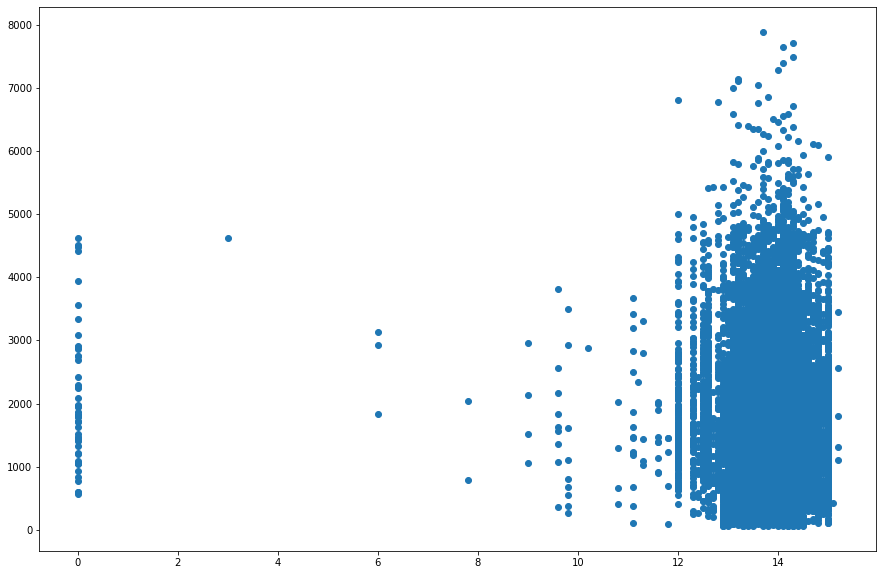

In [92]:
plt.scatter(x=df_actual['Average_Rating'],y=df_actual['Time from Pickup to Arrival'])

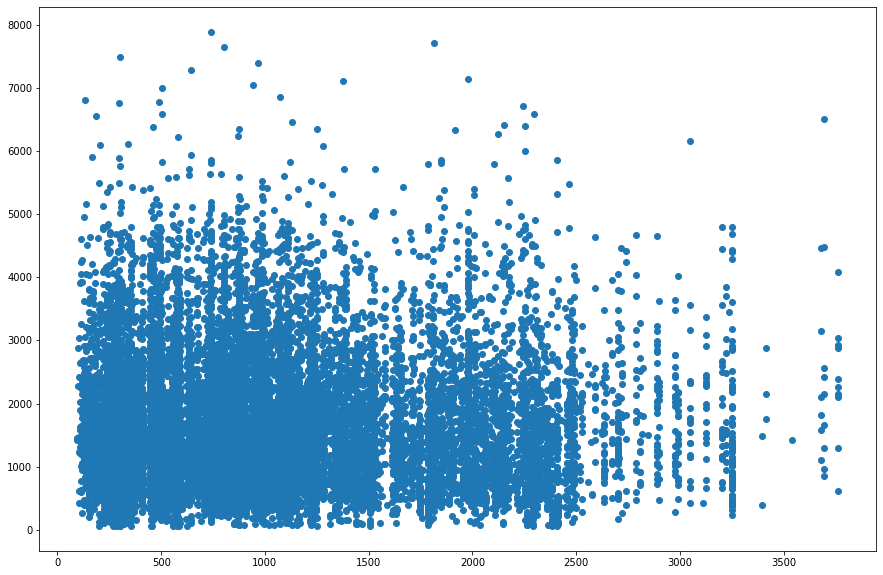

In [93]:
plt.scatter(x=df_actual['Age'],y=df_actual['Time from Pickup to Arrival'])

#### Which drivers are most likely to give outliers

In [94]:
#df_test[df_test['Rider Id'] == 'Rider_Id_619']

In [95]:
df['Average_Rating'].max()

15.2

In [96]:
#df_train['Rider Id'].nunique(),df_test['Rider Id'].nunique()

#### Average time taken for each distance

In [97]:
df_actual.groupby('Distance (KM)')['Time from Pickup to Arrival'].mean()

Distance (KM)
1      587.210526
2      666.909489
3      867.709234
4      942.127190
5     1186.997291
6     1289.322849
7     1420.619163
8     1525.906218
9     1599.868147
10    1663.105079
11    1766.591420
12    1929.187500
13    1948.419591
14    2056.133850
15    2181.639269
16    2275.792776
17    2319.458574
18    2470.936543
19    2462.983165
20    2623.359133
21    2623.294574
22    2800.335079
23    2972.301676
24    3102.000000
25    2672.660377
26    3121.877551
27    3315.977273
28    3349.589286
29    2981.806452
30    3331.454545
31    3602.500000
32    3870.000000
33    3745.100000
34    3534.750000
35    2878.500000
36    3286.285714
37    3968.250000
38    4457.500000
39    3667.000000
40    2789.000000
41    3722.500000
44    4233.000000
46    4797.000000
47            NaN
48    5530.000000
49    3799.000000
Name: Time from Pickup to Arrival, dtype: float64

In [98]:
df_actual.groupby(['Distance (KM)','Rider Id'])['Time from Pickup to Arrival'].mean()

Distance (KM)  Rider Id    
1              Rider_Id_100     349.00
               Rider_Id_101     382.75
               Rider_Id_102     197.00
               Rider_Id_103     382.25
               Rider_Id_104    1159.00
                                ...   
44             Rider_Id_661    4233.00
46             Rider_Id_815    4797.00
47             Rider_Id_726        NaN
48             Rider_Id_102    5530.00
49             Rider_Id_756    3799.00
Name: Time from Pickup to Arrival, Length: 9910, dtype: float64

In [99]:
df_actual.groupby('Distance (KM)')['Time from Pickup to Arrival'].mean()

Distance (KM)
1      587.210526
2      666.909489
3      867.709234
4      942.127190
5     1186.997291
6     1289.322849
7     1420.619163
8     1525.906218
9     1599.868147
10    1663.105079
11    1766.591420
12    1929.187500
13    1948.419591
14    2056.133850
15    2181.639269
16    2275.792776
17    2319.458574
18    2470.936543
19    2462.983165
20    2623.359133
21    2623.294574
22    2800.335079
23    2972.301676
24    3102.000000
25    2672.660377
26    3121.877551
27    3315.977273
28    3349.589286
29    2981.806452
30    3331.454545
31    3602.500000
32    3870.000000
33    3745.100000
34    3534.750000
35    2878.500000
36    3286.285714
37    3968.250000
38    4457.500000
39    3667.000000
40    2789.000000
41    3722.500000
44    4233.000000
46    4797.000000
47            NaN
48    5530.000000
49    3799.000000
Name: Time from Pickup to Arrival, dtype: float64

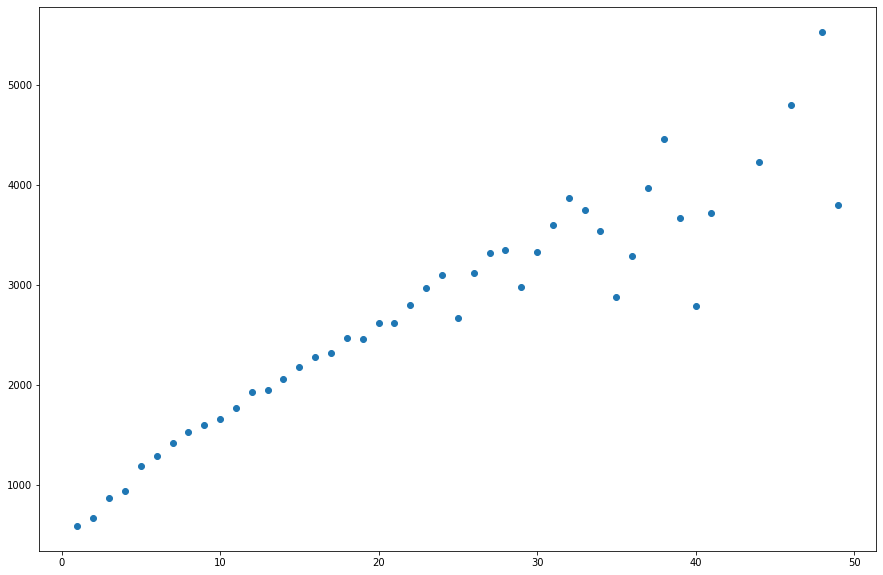

In [100]:
plt.scatter(x=df_actual.groupby('Distance (KM)')['Time from Pickup to Arrival'].mean().index,y=df_actual.groupby('Distance (KM)')['Time from Pickup to Arrival'].mean().values)

#### Number of orders per day

In [101]:
df_actual.columns

Index(['Arrival at Pickup - Day of Month', 'Arrival at Pickup - Time',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Time', 'Confirmation - Weekday (Mo = 1)',
       'Destination Lat', 'Destination Long', 'Distance (KM)', 'Order No',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long',
       'Placement - Day of Month', 'Placement - Time',
       'Placement - Weekday (Mo = 1)', 'Platform Type',
       'Precipitation in millimeters', 'Rider Id', 'Temperature',
       'Time from Pickup to Arrival', 'User Id', 'Vehicle Type', 'col_type',
       'orders', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [102]:
df_actual.groupby(['Pickup - Day of Month','Pickup - Weekday (Mo = 1)'])['Time from Pickup to Arrival'].count()

Pickup - Day of Month  Pickup - Weekday (Mo = 1)
1                      1                            145
                       2                              5
                       3                             63
                       4                             90
                       5                            126
                                                   ... 
31                     2                             66
                       3                             93
                       4                            124
                       5                            121
                       7                              2
Name: Time from Pickup to Arrival, Length: 216, dtype: int64

#### Cleaning and Prepping features

In [103]:
df = df_actual.copy()

In [104]:
df.columns

Index(['Arrival at Pickup - Day of Month', 'Arrival at Pickup - Time',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Time', 'Confirmation - Weekday (Mo = 1)',
       'Destination Lat', 'Destination Long', 'Distance (KM)', 'Order No',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long',
       'Placement - Day of Month', 'Placement - Time',
       'Placement - Weekday (Mo = 1)', 'Platform Type',
       'Precipitation in millimeters', 'Rider Id', 'Temperature',
       'Time from Pickup to Arrival', 'User Id', 'Vehicle Type', 'col_type',
       'orders', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [105]:
df.dtypes

Arrival at Pickup - Day of Month          int64
Arrival at Pickup - Time                 object
Arrival at Pickup - Weekday (Mo = 1)      int64
Confirmation - Day of Month               int64
Confirmation - Time                      object
Confirmation - Weekday (Mo = 1)           int64
Destination Lat                         float64
Destination Long                        float64
Distance (KM)                             int64
Order No                                 object
Personal or Business                     object
Pickup - Day of Month                     int64
Pickup - Time                            object
Pickup - Weekday (Mo = 1)                 int64
Pickup Lat                              float64
Pickup Long                             float64
Placement - Day of Month                float64
Placement - Time                         object
Placement - Weekday (Mo = 1)            float64
Platform Type                             int64
Precipitation in millimeters            

In [106]:
dt_cols = [
    "Arrival at Pickup - Time",
    "Confirmation - Time",
    "Pickup - Time",
    "Placement - Time",
]


In [107]:
df['Arrival at Pickup - Time']

21987     2:18:16 PM
6831     12:15:06 PM
720      10:12:28 AM
18360     3:51:52 PM
694       3:18:55 PM
            ...     
14908    10:57:35 AM
27662     1:36:34 PM
10254     8:47:02 AM
7990      4:50:38 PM
6882      1:15:03 PM
Name: Arrival at Pickup - Time, Length: 27529, dtype: object

In [108]:
def convert_dt(df, cols):
    df[cols] = df[cols].apply(pd.to_datetime)
    return df


In [109]:
df = convert_dt(df,dt_cols)

In [110]:
display_all(df)

,Arrival at Pickup - Day of Month,Arrival at Pickup - Time,Arrival at Pickup - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Time,Confirmation - Weekday (Mo = 1),Destination Lat,Destination Long,Distance (KM),Order No,Personal or Business,Pickup - Day of Month,Pickup - Time,Pickup - Weekday (Mo = 1),Pickup Lat,Pickup Long,Placement - Day of Month,Placement - Time,Placement - Weekday (Mo = 1),Platform Type,Precipitation in millimeters,Rider Id,Temperature,Time from Pickup to Arrival,User Id,Vehicle Type,col_type,orders,No_Of_Orders,Age,Average_Rating,No_of_Ratings
21987,26,2019-11-05 14:18:16,2,26,2019-11-05 13:55:41,2,-1.316539,36.706856,8,Order_No_0,Business,26,2019-11-05 14:20:40,2,-1.301908,36.759282,26.0,2019-11-05 13:47:47,2.0,3,NaN,Rider_Id_678,31.0,NaN,User_Id_1085,Bike,test,0,292,349,15.0,39
6831,9,2019-11-05 12:15:06,2,9,2019-11-05 12:12:24,2,-1.265971,36.766806,4,Order_No_1,Personal,9,2019-11-05 12:20:43,2,-1.274173,36.796911,NaN,NaT,NaN,1,NaN,Rider_Id_848,21.8,729.0,NaN,NaN,train,1,1043,771,14.1,76
720,18,2019-11-05 10:12:28,4,18,2019-11-05 10:09:50,4,-1.388201,36.769945,16,Order_No_2,Business,18,2019-11-05 10:51:52,4,-1.300921,36.828195,NaN,NaT,NaN,3,NaN,Rider_Id_148,NaN,1923.0,NaN,NaN,train,2,4671,941,14.1,973
18360,29,2019-11-05 15:51:52,3,29,2019-11-05 15:16:26,3,-1.283333,36.826008,4,Order_No_3,Business,29,2019-11-05 15:53:37,3,-1.260234,36.799055,NaN,NaT,NaN,3,NaN,Rider_Id_393,20.9,2186.0,NaN,NaN,train,3,3427,2385,14.2,1010
694,12,2019-11-05 15:18:55,2,12,2019-11-05 14:59:22,2,-1.285565,36.824483,5,Order_No_4,Personal,12,2019-11-05 15:52:51,2,-1.301607,36.840449,NaN,NaT,NaN,3,NaN,Rider_Id_181,NaN,1688.0,NaN,NaN,train,4,34,291,15.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14908,21,2019-11-05 10:57:35,1,21,2019-11-05 10:54:19,1,-1.290894,36.822971,4,Order_No_28264,Business,21,2019-11-05 11:02:32,1,-1.293881,36.812950,NaN,NaT,NaN,3,NaN,Rider_Id_458,25.4,4198.0,NaN,NaN,train,28264,1998,777,14.4,418
27662,2,2019-11-05 13:36:34,5,2,2019-11-05 13:26:53,5,-1.240935,36.874305,12,Order_No_28265,Business,2,2019-11-05 13:45:56,5,-1.257147,36.795063,2.0,2019-11-05 13:24:25,5.0,3,NaN,Rider_Id_770,25.2,NaN,User_Id_3295,Bike,test,28265,2311,872,14.1,533
10254,28,2019-11-05 08:47:02,5,28,2019-11-05 08:42:37,5,-1.289219,36.737498,6,Order_No_28266,Business,28,2019-11-05 08:53:21,5,-1.288148,36.785028,NaN,NaT,NaN,3,NaN,Rider_Id_612,20.8,2257.0,NaN,NaN,train,28266,730,642,14.0,80
7990,1,2019-11-05 16:50:38,1,1,2019-11-05 16:42:44,1,-1.241332,36.878553,10,Order_No_28267,Business,1,2019-11-05 17:04:27,1,-1.258414,36.804800,NaN,NaT,NaN,3,NaN,Rider_Id_218,27.4,1510.0,NaN,NaN,train,28267,187,285,14.2,15


In [111]:
df.columns

Index(['Arrival at Pickup - Day of Month', 'Arrival at Pickup - Time',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Time', 'Confirmation - Weekday (Mo = 1)',
       'Destination Lat', 'Destination Long', 'Distance (KM)', 'Order No',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long',
       'Placement - Day of Month', 'Placement - Time',
       'Placement - Weekday (Mo = 1)', 'Platform Type',
       'Precipitation in millimeters', 'Rider Id', 'Temperature',
       'Time from Pickup to Arrival', 'User Id', 'Vehicle Type', 'col_type',
       'orders', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In [112]:
df['delay_in_pickup'] = (df['Arrival at Pickup - Time'] - df['Confirmation - Time']).dt.total_seconds()

In [113]:
drop_a = ['Arrival at Pickup - Time','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)'
          ,'Confirmation - Time','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Placement - Day of Month',
       'Placement - Time', 'Placement - Weekday (Mo = 1)','User Id','Order No']

In [114]:
df = df.drop(drop_a,axis=1)

In [115]:
df.columns

Index(['Destination Lat', 'Destination Long', 'Distance (KM)',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long',
       'Platform Type', 'Precipitation in millimeters', 'Rider Id',
       'Temperature', 'Time from Pickup to Arrival', 'Vehicle Type',
       'col_type', 'orders', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'delay_in_pickup'],
      dtype='object')

In [116]:
df['Platform Type'].value_counts()

3    23348
1     2844
2     1311
4       26
Name: Platform Type, dtype: int64

In [117]:
df['Precipitation in millimeters'].fillna(0,inplace=True)

In [118]:
df['Precipitation in millimeters'].isna().sum()

0

In [119]:
df.columns

Index(['Destination Lat', 'Destination Long', 'Distance (KM)',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long',
       'Platform Type', 'Precipitation in millimeters', 'Rider Id',
       'Temperature', 'Time from Pickup to Arrival', 'Vehicle Type',
       'col_type', 'orders', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'delay_in_pickup'],
      dtype='object')

#### Datetime columns

In [120]:
df['Pickup - Time'] = df['Pickup - Time'].apply(lambda x: x.hour)
df['Pickup - Time'] = df['Pickup - Time'].apply(day)

In [121]:
df['Pickup - Time'].unique()

array(['normal', 'rush'], dtype=object)

In [122]:
df['Pickup - Day of Month'] = df['Pickup - Day of Month'].apply(month)

In [123]:
df['Pickup - Day of Month'].value_counts()

beg_month    9267
endmonth     9187
midmonth     9075
Name: Pickup - Day of Month, dtype: int64

In [124]:
df['unrated'] = df['No_Of_Orders'] - df['No_of_Ratings']

In [125]:
df.columns

Index(['Destination Lat', 'Destination Long', 'Distance (KM)',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long',
       'Platform Type', 'Precipitation in millimeters', 'Rider Id',
       'Temperature', 'Time from Pickup to Arrival', 'Vehicle Type',
       'col_type', 'orders', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'delay_in_pickup', 'unrated'],
      dtype='object')

In [126]:
cat = ['Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)','Vehicle Type','Platform Type']
to_drop = ['No_of_Ratings','No_Of_Orders','Destination Lat', 'Destination Long','Pickup Lat', 'Pickup Long']

In [127]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

In [191]:
df['dest_x'] = np.cos(df['Destination Lat']) * np.cos(df['Destination Long'])
df['dest_y'] = np.cos(df['Destination Lat']) * np.sin(df['Destination Long'])
df['dest_z'] = np.sin(df['Destination Lat'])

In [192]:
df['pick_x'] = np.cos(df['Pickup Lat']) * np.cos(df['Pickup Long'])
df['pick_y'] = np.cos(df['Pickup Lat']) * np.sin(df['Pickup Long'])
df['pick_z'] = np.sin(df['Pickup Lat'])

In [193]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

In [194]:
df_final =  pd.get_dummies(data=df, columns=cat)

In [195]:
df = df_final.copy()

In [196]:
df = df.drop(to_drop,axis=1)

In [200]:
df.head()

,Distance (KM),Precipitation in millimeters,Temperature,Time from Pickup to Arrival,col_type,Age,Average_Rating,delay_in_pickup,unrated,dest_x,...,Pickup - Weekday (Mo = 1)_3,Pickup - Weekday (Mo = 1)_4,Pickup - Weekday (Mo = 1)_5,Pickup - Weekday (Mo = 1)_6,Pickup - Weekday (Mo = 1)_7,Vehicle Type_Bike,Platform Type_1,Platform Type_2,Platform Type_3,Platform Type_4
0,4,0.0,20.400000,745.0,train,1309,13.8,1477.0,1088,0.172366,...,0,0,1,0,0,0,0,0,1,0
1,16,0.0,26.400000,1993.0,train,339,13.6,1021.0,327,0.172503,...,0,0,1,0,0,0,0,0,1,0
2,3,0.0,23.255689,455.0,train,242,12.5,410.0,909,0.171731,...,0,0,0,0,0,0,0,0,1,0
3,9,0.0,19.200000,1341.0,train,283,14.5,711.0,773,0.190806,...,0,0,1,0,0,0,0,0,1,0
4,9,0.0,15.400000,1214.0,train,872,14.1,455.0,1778,0.171522,...,0,0,0,0,0,0,1,0,0,0


In [132]:
df['log_trip_duration'] = np.log(df['Time from Pickup to Arrival'].values + 1)

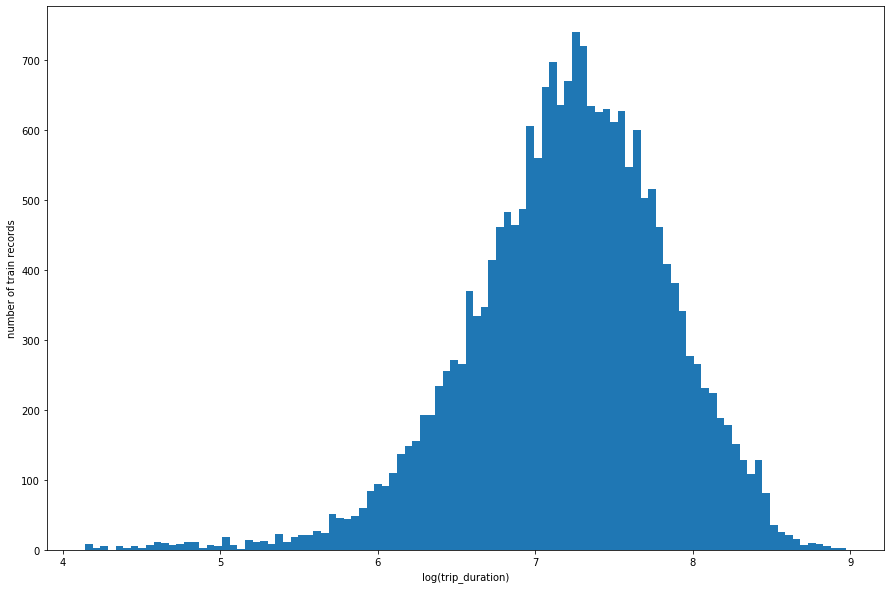

In [134]:
plt.hist(df['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

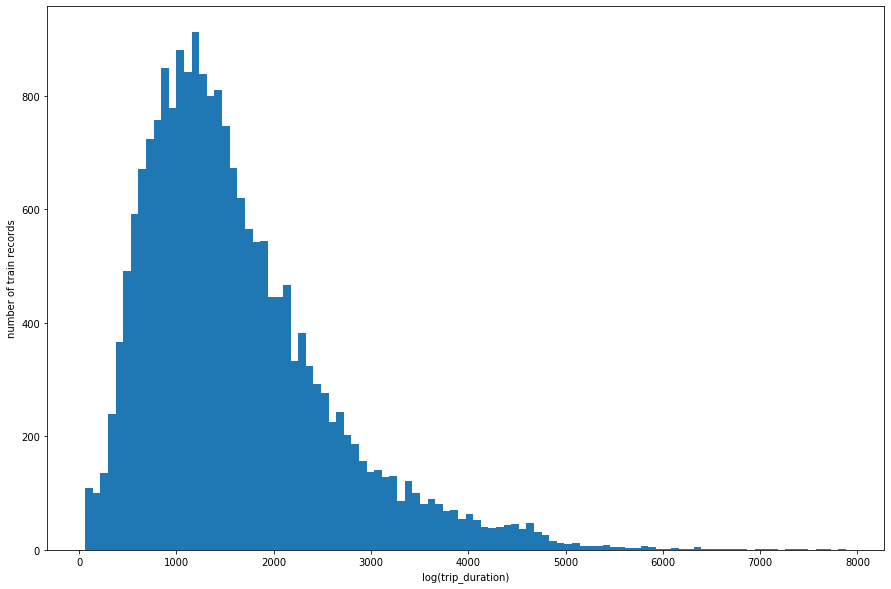

In [135]:
plt.hist(df['Time from Pickup to Arrival'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [172]:
df_variable_definitions['Unique number identifying the order'].iloc[9]

'Confirmation - Time - Time of day the order was confirmed by a rider'

In [173]:
df_variable_definitions['Unique number identifying the order'].iloc[12]

'Time of day the the rider arrived at the location to pick up the order - as marked by the rider through the Sendy application'

In [174]:
df_variable_definitions['Unique number identifying the order'].iloc[19]

'The distance from Pickup to Destination'

In [175]:
df_variable_definitions['Unique number identifying the order'].iloc[21]

' Precipitation at the time of order placement (measured every three hours)'

In [176]:
df_variable_definitions['Unique number identifying the order'].iloc[20]

'Temperature at the time of order placement in Degrees Celsius (measured every three hours)'

In [188]:
len(df[df['Temperature'].isnull() & df['Precipitation in millimeters'].isnull()])

5803

In [189]:
len(df[df['Temperature'].isnull()])

5803

In [136]:
df_variable_definitions

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [197]:
train = df[df['col_type'] == 'train']
test = df[df['col_type'] == 'test']

In [198]:
train = train.drop('col_type',axis=1)
test = test.drop('col_type',axis=1)

In [199]:
import os
os.makedirs('tmp', exist_ok=True)
df.reset_index().to_feather('tmp/df')
train.reset_index().to_feather('tmp/train')
test.reset_index().to_feather('tmp/test')

#### REPLICATION

In [90]:
df_riders = pd.read_csv("data/Riders.csv")
df_sample_submission = pd.read_csv("data/SampleSubmission.csv")
df_test = pd.read_csv("data/Test.csv")
df_train = pd.read_csv("data/Train.csv")
df_variable_definitions = pd.read_csv("data/VariableDefinitions.csv")

In [91]:
df_test['orders'] = df_test['Order No'].str.split('_').str[-1].astype(int)
df_train['orders'] = df_train['Order No'].str.split('_').str[-1].astype(int)

disjoint_cols = [
    "Arrival at Destination - Time",
    "Arrival at Destination - Weekday (Mo = 1)",
    "Arrival at Destination - Day of Month",
    "User Id",
    "Vehicle Type",
]
def combine_train_test(train, test, rider, disjoint_cols):
    train["col_type"] = "train"
    test["col_type"] = "test"
    df_train_test = pd.concat(
        [train.drop(disjoint_cols, axis=1), test], ignore_index=True, sort=True
    )
    df_merged = df_train_test.merge(rider, how="left", on="Rider Id")
    #df = df_merged.drop("Rider Id", axis=1)
    return df_merged

df = combine_train_test(df_train, df_test, df_riders, disjoint_cols)

In [92]:
df['Placement - Time'] = pd.to_datetime(df['Placement - Time'])
df['placement_hour'] = df['Placement - Time'].apply(lambda x: x.hour)
df['Confirmation - Time'] = pd.to_datetime( df['Confirmation - Time'])
df['conf_hour'] = df['Confirmation - Time'].apply(lambda x: x.hour)
df['Pickup - Time'] = pd.to_datetime(df['Pickup - Time'])
df['pick_up_time'] = df['Pickup - Time'].apply(lambda x: x.hour)
df = df.sort_values(by='orders')
df_outliers = df[(df['Time from Pickup to Arrival'] <= 60) & (df['Distance (KM)'] >= 1)]
df_actual = df[~((df['Time from Pickup to Arrival'] <= 60) & (df['Distance (KM)'] >= 1))]


df = df_actual.copy()
dt_cols = [
    "Arrival at Pickup - Time",
    "Confirmation - Time",
    "Pickup - Time",
    "Placement - Time",
]

df = convert_dt(df,dt_cols)

In [93]:
df['delay_in_pickup'] = (df['Arrival at Pickup - Time'] - df['Confirmation - Time']).dt.total_seconds()

In [94]:
drop_a = ['Arrival at Pickup - Time','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)'
          ,'Confirmation - Time','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Placement - Day of Month',
       'Placement - Time', 'Placement - Weekday (Mo = 1)','User Id','Order No']

In [95]:
df = df.drop(drop_a,axis=1)

In [96]:
df['Precipitation in millimeters'].fillna(0,inplace=True)

In [97]:
df['Pickup - Time'] = df['Pickup - Time'].apply(lambda x: x.hour)
df['Pickup - Time'] = df['Pickup - Time'].apply(day)

In [98]:
df['Pickup - Time'].unique()

array(['normal', 'rush'], dtype=object)

In [99]:
df['Pickup - Day of Month'] = df['Pickup - Day of Month'].apply(month)

In [100]:
df['Pickup - Day of Month'].value_counts()

beg_month    9267
endmonth     9187
midmonth     9075
Name: Pickup - Day of Month, dtype: int64

In [101]:
df['unrated'] = df['No_Of_Orders'] - df['No_of_Ratings']

In [102]:
df.columns

Index(['Destination Lat', 'Destination Long', 'Distance (KM)',
       'Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)', 'Pickup Lat', 'Pickup Long',
       'Platform Type', 'Precipitation in millimeters', 'Rider Id',
       'Temperature', 'Time from Pickup to Arrival', 'Vehicle Type',
       'col_type', 'orders', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'placement_hour', 'conf_hour', 'pick_up_time',
       'delay_in_pickup', 'unrated'],
      dtype='object')

In [103]:
cat = ['Personal or Business', 'Pickup - Day of Month', 'Pickup - Time',
       'Pickup - Weekday (Mo = 1)','Vehicle Type','Platform Type']
to_drop = ['No_of_Ratings','No_Of_Orders','Destination Lat', 'Destination Long','Pickup Lat', 'Pickup Long','Rider Id', 'conf_hour', 'orders', 'pick_up_time', 'placement_hour']

In [104]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

In [105]:
df['dest_x'] = np.cos(df['Destination Lat']) * np.cos(df['Destination Long'])
df['dest_y'] = np.cos(df['Destination Lat']) * np.sin(df['Destination Long'])
df['dest_z'] = np.sin(df['Destination Lat'])

In [106]:
df['pick_x'] = np.cos(df['Pickup Lat']) * np.cos(df['Pickup Long'])
df['pick_y'] = np.cos(df['Pickup Lat']) * np.sin(df['Pickup Long'])
df['pick_z'] = np.sin(df['Pickup Lat'])

In [107]:
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

In [108]:
df_final =  pd.get_dummies(data=df, columns=cat)

In [109]:
df = df_final.copy()

In [110]:
df = df.drop(to_drop,axis=1)

In [111]:
train = df[df['col_type'] == 'train']
test = df[df['col_type'] == 'test']
train = train.drop('col_type',axis=1)
test = test.drop('col_type',axis=1)

In [113]:
import os
os.makedirs('test', exist_ok=True)
df.reset_index().to_feather('test/df')
train.reset_index().to_feather('test/train')
test.reset_index().to_feather('test/test')

#### Testing

In [114]:
train_1 = pd.read_feather("tmp/train").set_index("index")
train_2 = pd.read_feather("test/train").set_index("index").sort_index()

In [115]:
test_1 = pd.read_feather("tmp/test").set_index("index")
test_2 = pd.read_feather("test/test").set_index("index").sort_index()

In [116]:
train_1.shape,train_2.shape

((21201, 33), (20461, 33))

In [117]:
set(train_1.columns).issubset(set(train_2.columns))

True

In [118]:
(set(train_2.columns)) - set(train_1.columns)

set()

In [119]:
list(train_2.dtypes) == list(train_2.dtypes)

True

In [120]:
from pandas.testing import assert_frame_equal

assert_frame_equal(train_1, train_2, check_dtype=False)

AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (21201, 33)
[right]: (20461, 33)

In [121]:
assert_frame_equal(test_1, test_2, check_dtype=False)

AssertionError: DataFrame.iloc[:, 2] are different

DataFrame.iloc[:, 2] values are different (20.33107 %)
[left]:  [23.255688596100775, 23.255688596100775, 22.8, 24.5, 24.4, 19.3, 20.9, 22.7, 19.4, 21.7, 19.6, 27.4, 20.7, 23.255688596100775, 27.2, 25.7, 20.4, 16.8, 20.3, 23.255688596100775, 21.0, 23.255688596100775, 27.8, 23.0, 17.9, 25.5, 23.255688596100775, 18.3, 24.6, 23.255688596100775, 23.255688596100775, 20.8, 20.5, 23.6, 21.5, 22.1, 23.255688596100775, 24.5, 23.255688596100775, 23.255688596100775, 24.7, 18.4, 23.255688596100775, 18.4, 24.4, 19.8, 22.2, 24.9, 23.255688596100775, 23.255688596100775, 25.9, 23.255688596100775, 20.9, 23.255688596100775, 25.5, 28.4, 21.2, 23.255688596100775, 21.8, 17.9, 25.5, 29.7, 23.255688596100775, 24.2, 14.4, 23.255688596100775, 25.5, 19.9, 21.8, 24.7, 23.1, 23.255688596100775, 23.255688596100775, 24.7, 20.8, 26.4, 31.0, 23.255688596100775, 20.7, 23.255688596100775, 15.6, 23.255688596100775, 23.255688596100775, 23.4, 25.2, 26.4, 23.255688596100775, 23.255688596100775, 23.1, 25.1, 25.6, 23.255688596100775, 20.6, 25.0, 23.7, 21.2, 25.4, 21.5, 24.5, 24.0, ...]
[right]: [23.223762602071094, 23.223762602071094, 22.8, 24.5, 24.4, 19.3, 20.9, 22.7, 19.4, 21.7, 19.6, 27.4, 20.7, 23.223762602071094, 27.2, 25.7, 20.4, 16.8, 20.3, 23.223762602071094, 21.0, 23.223762602071094, 27.8, 23.0, 17.9, 25.5, 23.223762602071094, 18.3, 24.6, 23.223762602071094, 23.223762602071094, 20.8, 20.5, 23.6, 21.5, 22.1, 23.223762602071094, 24.5, 23.223762602071094, 23.223762602071094, 24.7, 18.4, 23.223762602071094, 18.4, 24.4, 19.8, 22.2, 24.9, 23.223762602071094, 23.223762602071094, 25.9, 23.223762602071094, 20.9, 23.223762602071094, 25.5, 28.4, 21.2, 23.223762602071094, 21.8, 17.9, 25.5, 29.7, 23.223762602071094, 24.2, 14.4, 23.223762602071094, 25.5, 19.9, 21.8, 24.7, 23.1, 23.223762602071094, 23.223762602071094, 24.7, 20.8, 26.4, 31.0, 23.223762602071094, 20.7, 23.223762602071094, 15.6, 23.223762602071094, 23.223762602071094, 23.4, 25.2, 26.4, 23.223762602071094, 23.223762602071094, 23.1, 25.1, 25.6, 23.223762602071094, 20.6, 25.0, 23.7, 21.2, 25.4, 21.5, 24.5, 24.0, ...]

In [88]:
train_1.columns.to_list()

['Distance (KM)',
 'Precipitation in millimeters',
 'Temperature',
 'Time from Pickup to Arrival',
 'Age',
 'Average_Rating',
 'delay_in_pickup',
 'unrated',
 'dest_x',
 'dest_y',
 'dest_z',
 'pick_x',
 'pick_y',
 'pick_z',
 'Personal or Business_Business',
 'Personal or Business_Personal',
 'Pickup - Day of Month_beg_month',
 'Pickup - Day of Month_endmonth',
 'Pickup - Day of Month_midmonth',
 'Pickup - Time_normal',
 'Pickup - Time_rush',
 'Pickup - Weekday (Mo = 1)_1',
 'Pickup - Weekday (Mo = 1)_2',
 'Pickup - Weekday (Mo = 1)_3',
 'Pickup - Weekday (Mo = 1)_4',
 'Pickup - Weekday (Mo = 1)_5',
 'Pickup - Weekday (Mo = 1)_6',
 'Pickup - Weekday (Mo = 1)_7',
 'Vehicle Type_Bike',
 'Platform Type_1',
 'Platform Type_2',
 'Platform Type_3',
 'Platform Type_4']